In [23]:
import pandas as pd
#import pandas.io.data
import pandas_datareader.data
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 4)

%matplotlib inline

import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

In [12]:
def getStockData(ticker, start, end):
    data = pd.io.data.DataReader(ticker, "yahoo", start, end)
    data.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
    data.insert(0, "Ticker", ticker)
    return data

In [13]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

getStockData("MSFT", start, end).head()

,Ticker,Open,High,...,Close,Volume,AdjClose
Date,,,,,,,
2012-01-03,MSFT,26.55,26.96,...,26.77,64731500,23.7731
2012-01-04,MSFT,26.82,27.47,...,27.40,80516100,24.3326
2012-01-05,MSFT,27.38,27.73,...,27.68,56081400,24.5812
2012-01-06,MSFT,27.53,28.19,...,28.11,99455500,24.9631
2012-01-09,MSFT,28.05,28.10,...,27.74,59706800,24.6345


In [14]:
def getDataForMultipleStocks(tickers, start, end):
    stocks = dict()
    for ticker in tickers:
        s = getStockData(ticker, start, end)
        stocks[ticker] = s
    return stocks

In [15]:
raw = getDataForMultipleStocks(["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", 
                                "UAL", "PEP", "KO"],
                                start, end)

raw['MSFT'][:5]

,Ticker,Open,High,...,Close,Volume,AdjClose
Date,,,,,,,
2012-01-03,MSFT,26.55,26.96,...,26.77,64731500,23.7731
2012-01-04,MSFT,26.82,27.47,...,27.40,80516100,24.3326
2012-01-05,MSFT,27.38,27.73,...,27.68,56081400,24.5812
2012-01-06,MSFT,27.53,28.19,...,28.11,99455500,24.9631
2012-01-09,MSFT,28.05,28.10,...,27.74,59706800,24.6345


In [39]:
def pivotTickersToColumns(raw, column):
    items = []
    for key in raw: # keys are the tickers  
        data = raw[key]
        subset = data[["Ticker", column]]
        items.append(subset)
        
    combined = pd.concat(items)
    ri = combined.reset_index()
    return ri.pivot("Date", "Ticker", column)

In [40]:
close_px = pivotTickersToColumns(raw, "AdjClose")
close_px[:5]

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-03,8.7798,54.4051,7.8331,...,23.7731,58.7063,18.90
2012-01-04,8.9890,54.6975,7.8039,...,24.3326,59.0069,18.52
2012-01-05,8.9034,55.3047,8.1157,...,24.5812,58.5472,18.39
2012-01-06,8.7132,55.8829,8.1059,...,24.9631,57.8133,18.21
2012-01-09,8.9700,55.7942,8.0670,...,24.6345,58.1139,17.93


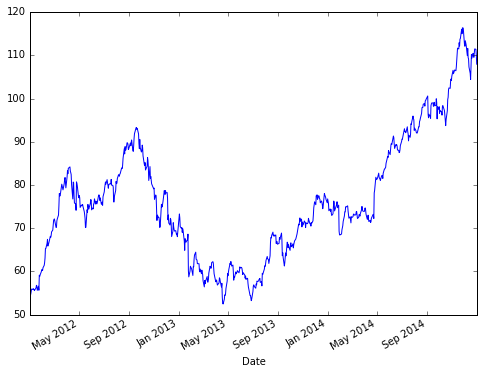

In [41]:
close_px['AAPL'].plot()

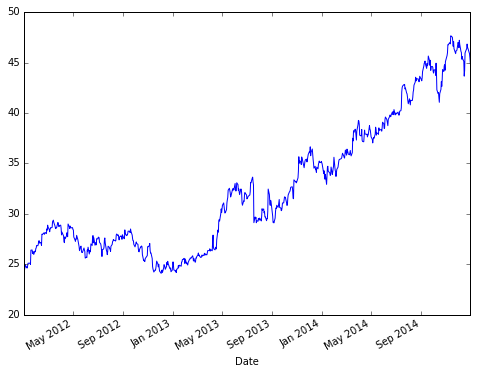

In [42]:
close_px['MSFT'].plot()

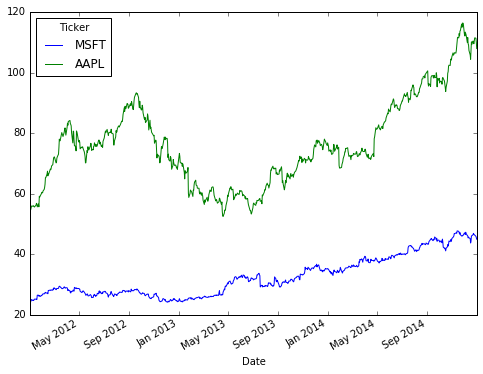

In [43]:
close_px[['MSFT', 'AAPL']].plot()

In [44]:
volumes = pivotTickersToColumns(raw, "Volume")
volumes.tail()

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2014-12-24,4944200,14479600,4296200,...,11437800,1604100,2714300
2014-12-26,6355200,33721000,5303100,...,13197800,1492700,3062200
2014-12-29,7087800,27598900,6656700,...,14439500,2453800,2874300
2014-12-30,9262100,29881500,7318900,...,16384700,2134400,2644600
2014-12-31,8842400,41403400,7801700,...,21552500,3727400,4451200


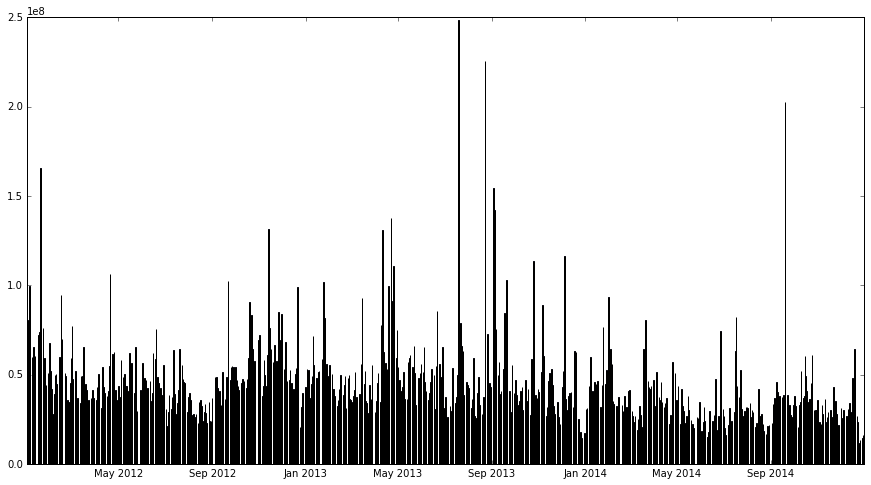

In [46]:
msftV = volumes[["MSFT"]]
plt.bar(msftV.index, msftV["MSFT"])
plt.gcf().set_size_inches(15, 8)

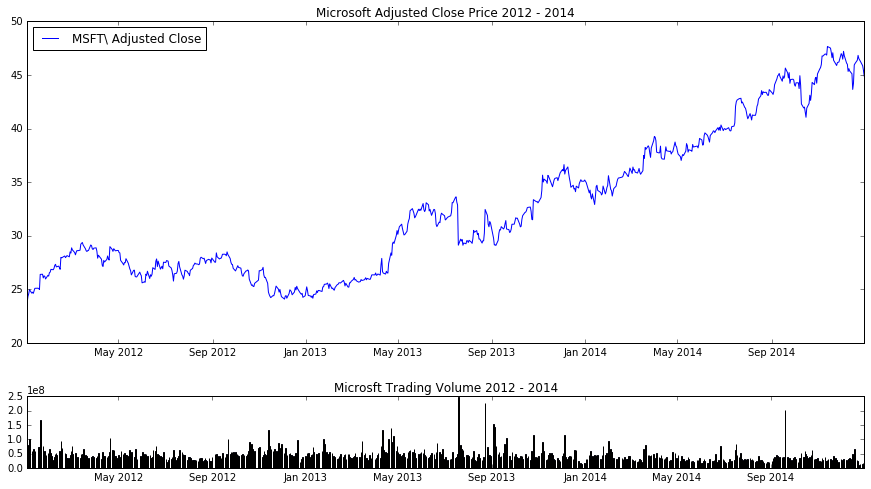

In [48]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], label='MSFT\ Adjusted Close')
plt.title("Microsoft Adjusted Close Price 2012 - 2014")
plt.legend(loc=2)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV['MSFT'])
plt.title('Microsft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

In [49]:
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-03,NaN,NaN,NaN,...,NaN,NaN,NaN
2012-01-04,0.0238,0.0054,-0.0037,...,0.0235,0.0051,-0.0201
2012-01-05,-0.0095,0.0111,0.0400,...,0.0102,-0.0078,-0.0070
2012-01-06,-0.0214,0.0105,-0.0012,...,0.0155,-0.0125,-0.0098
2012-01-09,0.0295,-0.0016,-0.0048,...,-0.0132,0.0052,-0.0154


In [50]:
close_px.ix['2012-01-05']['AAPL'] / close_px.ix['2012-01-04']\
['AAPL'] - 1

0.01110193721718189

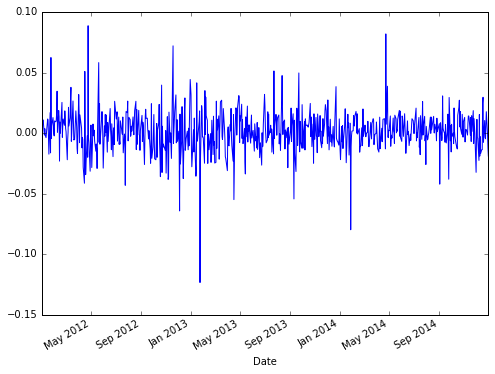

In [51]:
daily_pc["AAPL"].plot()

In [52]:
# cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-03,NaN,NaN,NaN,...,NaN,NaN,NaN
2012-01-04,1.0238,1.0054,0.9963,...,1.0235,1.0051,0.9799
2012-01-05,1.0141,1.0165,1.0361,...,1.0340,0.9973,0.9730
2012-01-06,0.9924,1.0272,1.0348,...,1.0501,0.9848,0.9635
2012-01-09,1.0217,1.0255,1.0299,...,1.0362,0.9899,0.9487


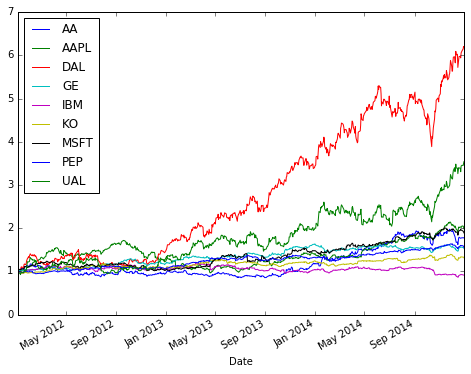

In [54]:
daily_cr.plot(figsize=(8, 6))
plt.legend(loc=2)

## Resample daily to monthly

In [56]:
# monthly = close_px.asfreq("EOM", method="ffill") # depreciated

monthly = close_px.asfreq("BM", method="ffill")
monthly[:5]

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-31,9.6644,60.3916,10.2786,...,26.2241,58.0609,23.10
2012-02-29,9.7026,71.7640,9.5576,...,28.3723,56.1035,20.65
2012-03-30,9.5595,79.3195,9.6648,...,28.8371,59.1431,21.50
2012-04-30,9.2828,77.2597,10.6780,...,28.6226,58.8311,21.92
2012-05-31,8.1839,76.4328,11.7887,...,26.2641,60.9532,25.17


In [57]:
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-31,NaN,NaN,NaN,...,NaN,NaN,NaN
2012-02-29,0.0039,0.1883,-0.0701,...,0.0819,-0.0337,-0.1061
2012-03-30,-0.0147,0.1053,0.0112,...,0.0164,0.0542,0.0412
2012-04-30,-0.0289,-0.0260,0.1048,...,-0.0074,-0.0053,0.0195
2012-05-31,-0.1184,-0.0107,0.1040,...,-0.0824,0.0361,0.1483


In [58]:
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-31,NaN,NaN,NaN,...,NaN,NaN,NaN
2012-02-29,1.0039,1.1883,0.9299,...,1.0819,0.9663,0.8939
2012-03-30,0.9891,1.3134,0.9403,...,1.0996,1.0186,0.9307
2012-04-30,0.9605,1.2793,1.0389,...,1.0915,1.0133,0.9489
2012-05-31,0.8468,1.2656,1.1469,...,1.0015,1.0498,1.0896


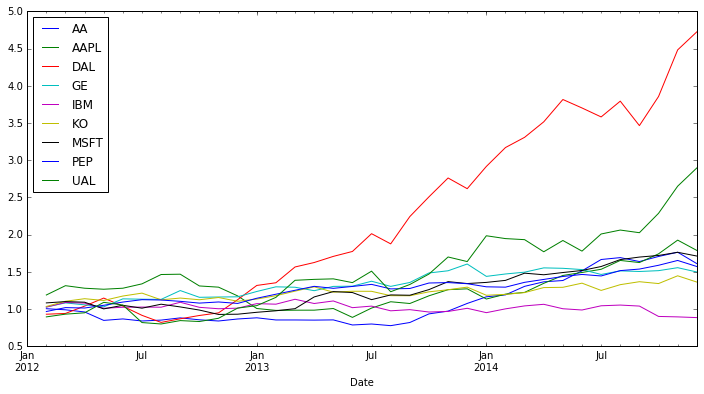

In [59]:
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2)

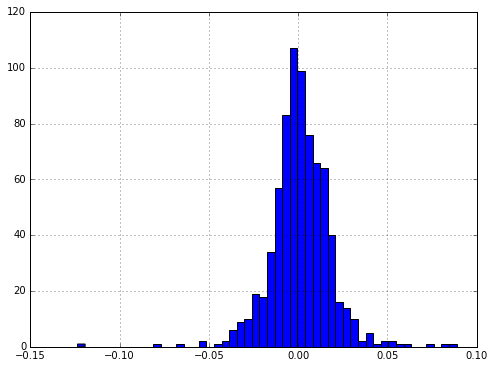

In [60]:
aapl = daily_pc['AAPL']
aapl.hist(bins=50)

In [61]:
aapl.describe()

count    753.0000
mean       0.0011
std        0.0169
min       -0.1236
25%       -0.0074
50%        0.0005
75%        0.0110
max        0.0887
Name: AAPL, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f7f2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11855e9b0>]], dtype=object)

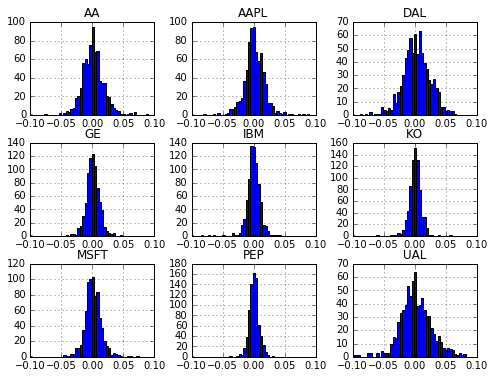

In [69]:
daily_pc.hist(bins=50, range=[-0.10, 0.09], figsize=(8,6))

In [64]:
daily_pc

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Date,,,,,,,
2012-01-03,NaN,NaN,NaN,...,NaN,NaN,NaN
2012-01-04,0.0238,0.0054,-0.0037,...,0.0235,0.0051,-0.0201
2012-01-05,-0.0095,0.0111,0.0400,...,0.0102,-0.0078,-0.0070
2012-01-06,-0.0214,0.0105,-0.0012,...,0.0155,-0.0125,-0.0098
2012-01-09,0.0295,-0.0016,-0.0048,...,-0.0132,0.0052,-0.0154
...,...,...,...,...,...,...,...
2014-12-24,0.0025,-0.0047,0.0195,...,-0.0064,-0.0028,0.0392
2014-12-26,0.0032,0.0177,0.0071,...,-0.0054,-0.0004,0.0054
2014-12-29,0.0000,-0.0007,0.0081,...,-0.0090,-0.0033,-0.0009


## Moving average

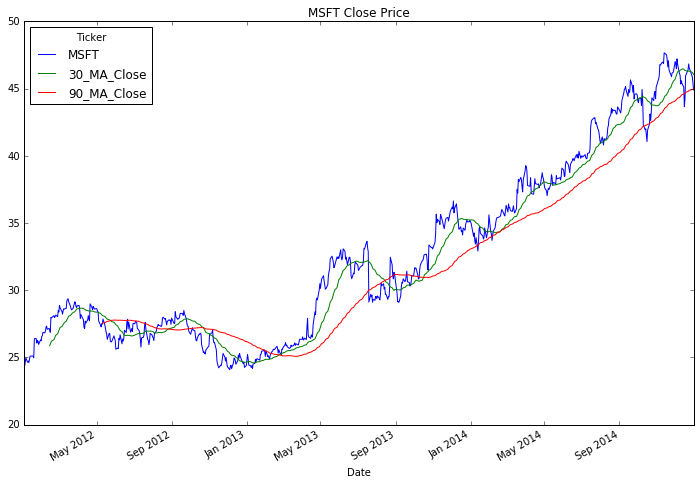

In [129]:
msft_close = close_px[['MSFT']][['MSFT']]
ma_30 = pd.stats.moments.rolling_mean(msft_close, 30)
ma_90 = pd.stats.moments.rolling_mean(msft_close, 90)


# result = pd.DataFrame({'Close': msft_close,
#                       '30_MA_Close': ma_30,
#                       '90_MA_Close': ma_90 })
# Resulted in: 
#   ValueError: If using all scalar values, you must pass an index

msft_close['30_MA_Close'] = ma_30
msft_close['90_MA_Close'] = ma_90

result =msft_close.copy()
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

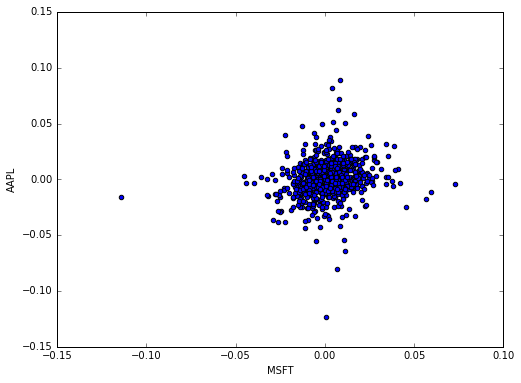

In [131]:
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')

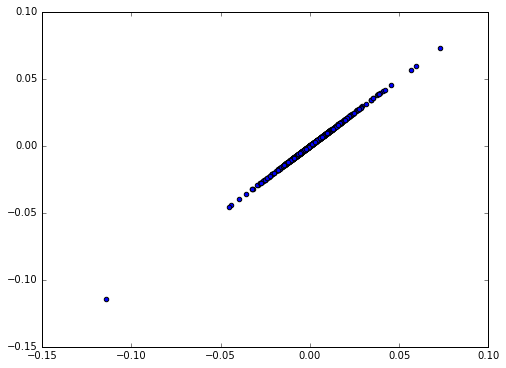

In [132]:
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120a1cfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123537630>]], dtype=object)

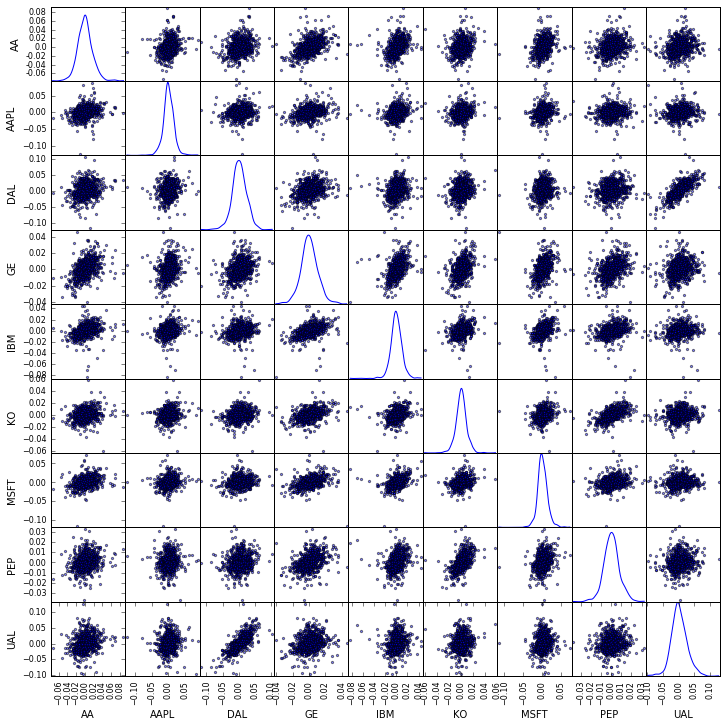

In [136]:
pd.scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1253632b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128585f60>]], dtype=object)

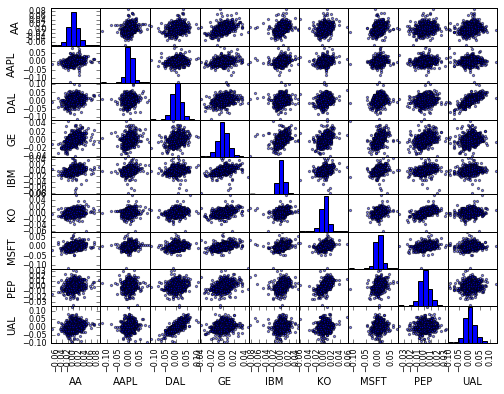

In [137]:
pd.scatter_matrix(daily_pc)

In [138]:
corrs = daily_pc.corr()
corrs

Ticker,AA,AAPL,DAL,...,MSFT,PEP,UAL
Ticker,,,,,,,
AA,1.0000,0.2366,0.2508,...,0.3103,0.2261,0.2213
AAPL,0.2366,1.0000,0.1352,...,0.1879,0.0918,0.0619
DAL,0.2508,0.1352,1.0000,...,0.1497,0.1746,0.7611
GE,0.4583,0.2389,0.3183,...,0.3425,0.3818,0.2376
IBM,0.3111,0.2115,0.1685,...,0.3568,0.2576,0.1241
KO,0.2282,0.1610,0.1871,...,0.2711,0.5573,0.1391
MSFT,0.3103,0.1879,0.1497,...,1.0000,0.2840,0.1274
PEP,0.2261,0.0918,0.1746,...,0.2840,1.0000,0.1300
UAL,0.2213,0.0619,0.7611,...,0.1274,0.1300,1.0000


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

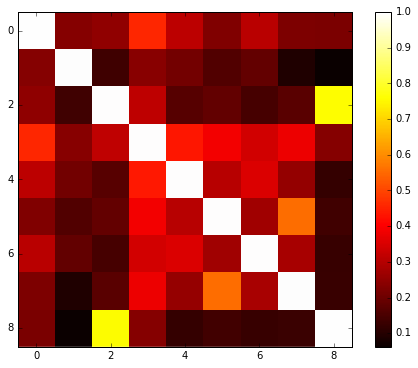

In [139]:
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xtick(range(len(corrs)), corrs.columns)
plt.ytick(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

## Volatility calculation

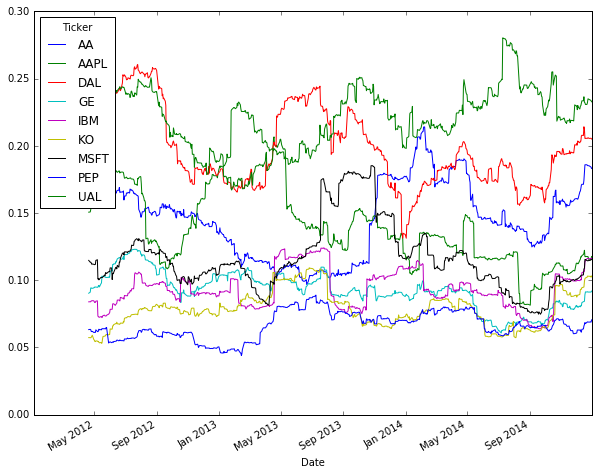

In [142]:
min_periods = 75
vol = pd.stats.moments.rolling_std(daily_pc, min_periods) *\
         np.sqrt(min_periods)
vol.plot(figsize=(10,8))

## Determining risk relative to expected returns

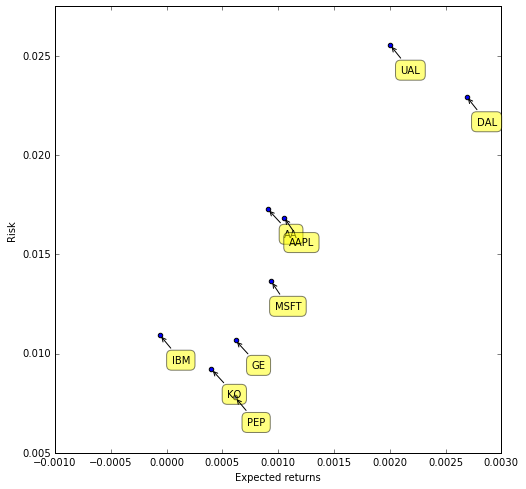

In [148]:
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(),
                       daily_pc.std()):
    plt.annotate(
         label,
         xy = (x, y), xytext = (30, -30),
         textcoords = 'offset points', ha= 'right', va = 'bottom',
         bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow',
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->',
                          connectionstyle = 'arc3, rad=0'))
        
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

plt.gcf().set_size_inches(8, 8)